<a href="https://colab.research.google.com/github/NicoNestasio/Antena-Horn/blob/main/Antena_17GHz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17GHz

   Unnamed: 0  Positions  Amplitudes
0           0        0.0     -51.814
1           1        0.0     -51.882
2           2        0.0     -51.696
3           3        0.1     -51.860
4           4        0.4     -51.800
Index(['Unnamed: 0', 'Positions', 'Amplitudes'], dtype='object')


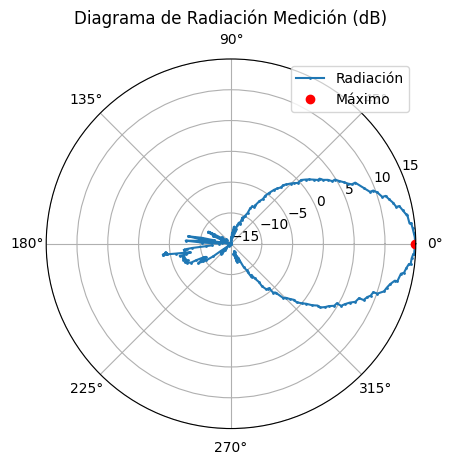

Máximo: 14.9


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Ruta del archivo Excel
ruta_csv = '/content/17 GHz - Pol. Principal - Diagrama de radiación-raw.csv'

# Importar datos desde Excel a un DataFrame de pandas
datos = pd.read_csv(ruta_csv)
datos['Positions'] = datos['Positions'].str.replace('deg', '').astype(float)
datos['Amplitudes'] = datos['Amplitudes'].str.replace('dBm', '').astype(float)

# Ver los primeros registros para asegurarte de que los datos se importaron correctamente
print(datos.head())
print(datos.columns)

# Acceder a los datos de las columnas
angulos = np.deg2rad(datos['Positions'])
amplitudes = datos['Amplitudes']


# Encontrar el punto máximo
maximo_idx = np.argmax(amplitudes)
angulo_max = angulos[maximo_idx]
amplitud_max = amplitudes[maximo_idx]
diferencia = 14.9-amplitud_max

# Corrección de datos
amplitudescor = amplitudes+diferencia
amplitud_maxcor= 14.9
anguloscor = angulos - angulo_max
# Crear el gráfico
plt.figure()
plt.polar(anguloscor, amplitudescor, marker='o', markersize=1, label='Radiación')
plt.polar(0, amplitud_maxcor, 'ro', label='Máximo')
plt.title('Diagrama de Radiación Medición (dB)')
plt.legend()
plt.ylim(-15, 15)
plt.yticks(np.arange(-15, 16, 5))
plt.show()
print('Máximo:',amplitud_maxcor)


   Phi [deg]  dB(GainTotal)
0       -180      -4.719309
1       -178      -4.673809
2       -176      -4.858572
3       -174      -5.274473
4       -172      -5.924360
Index(['Phi [deg]', 'dB(GainTotal)'], dtype='object')


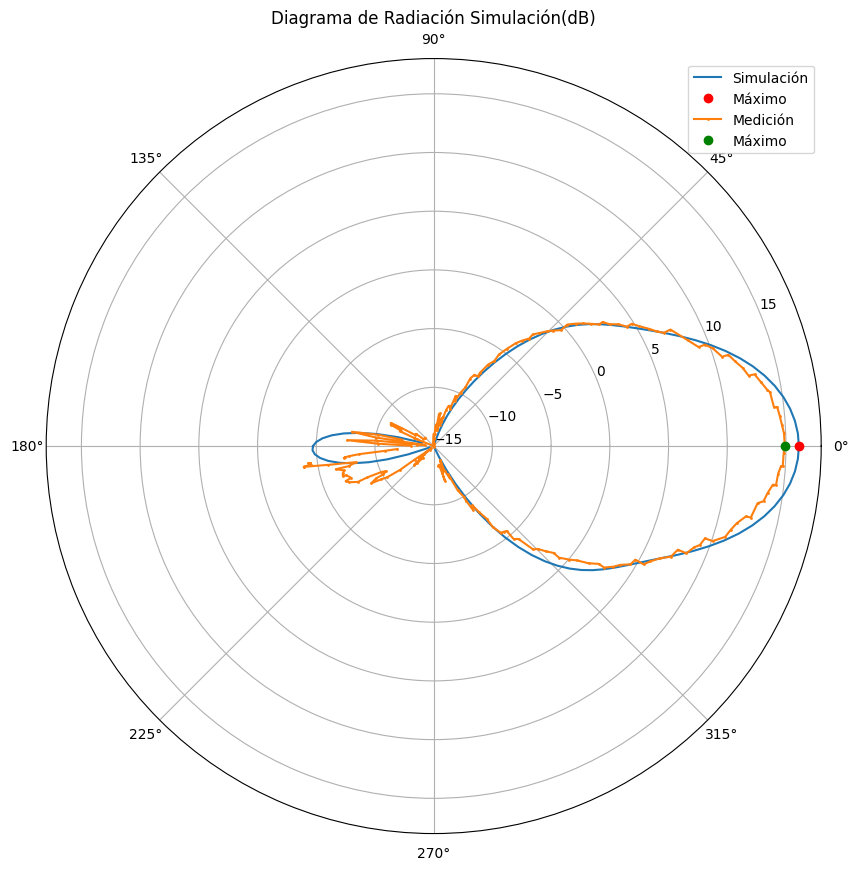

Máximo Simulado: 16.0989076780402
Máximo Medido: 14.9
Diferencia: 1.1989076780401984


In [8]:
# Gràfico (Simulación)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Ruta del archivo Excel
ruta_csv4 = '/content/Diagrama 17GHz.csv'

# Importar datos desde Excel a un DataFrame de pandas
datos4 = pd.read_csv(ruta_csv4)
datos4.rename(columns={datos4.columns[1]: 'dB(GainTotal)'}, inplace=True)
# Ver los primeros registros para asegurarte de que los datos se importaron correctamente
print(datos4.head())
print(datos4.columns)

# Acceder a los datos de las columnas
angulos4 = np.deg2rad(datos4['Phi [deg]'])
amplitudes4 = datos4['dB(GainTotal)']


# Encontrar el punto máximo
maximo_idx4 = np.argmax(amplitudes4)
angulo_max4 = angulos4[maximo_idx4]
amplitud_max4 = amplitudes4[maximo_idx4]
dif_max=amplitud_max4-amplitud_maxcor

# Crear el gráfico
plt.figure(figsize=(10, 20))
plt.polar(angulos4, amplitudes4, marker='o', markersize=0, label='Simulación')
plt.polar(angulo_max4, amplitud_max4, 'ro', label='Máximo')
plt.polar(anguloscor, amplitudescor, marker='o', markersize=1, label='Medición')
plt.polar(0, amplitud_maxcor, 'go', label='Máximo')
plt.title('Diagrama de Radiación Simulación(dB)')
plt.legend()
plt.ylim(-15, 18)  # Por ejemplo, establece el mínimo en 0 y el máximo en 20 dB
plt.yticks(np.arange(-15, 16, 5))
plt.show()
plt.show()
print('Máximo Simulado:',amplitud_max4 )
print('Máximo Medido:',amplitud_maxcor )
print('Diferencia:', dif_max)
